<a href="https://colab.research.google.com/github/machave11/Bike-Sharing-Demand/blob/main/Nikhil_Machave_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
import datetime as dt
import datetime as datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bike_df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding = 'unicode_escape')

In [4]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bike_df.shape

(8760, 14)

In [6]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
# Describe method is used for calculatin some statistical data like Mean, percentile,standard of numerical value. It analyse both numeric and object series and also dataframe column set of mixed data type.
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [8]:
# Info method usual gives imformation of Dataframes.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# finding how many null value are present in each column
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# Finding how many duolicate rows in our dataset
bike_df.duplicated().sum()

0

 In above, we come to know that No any duplicate and missing value

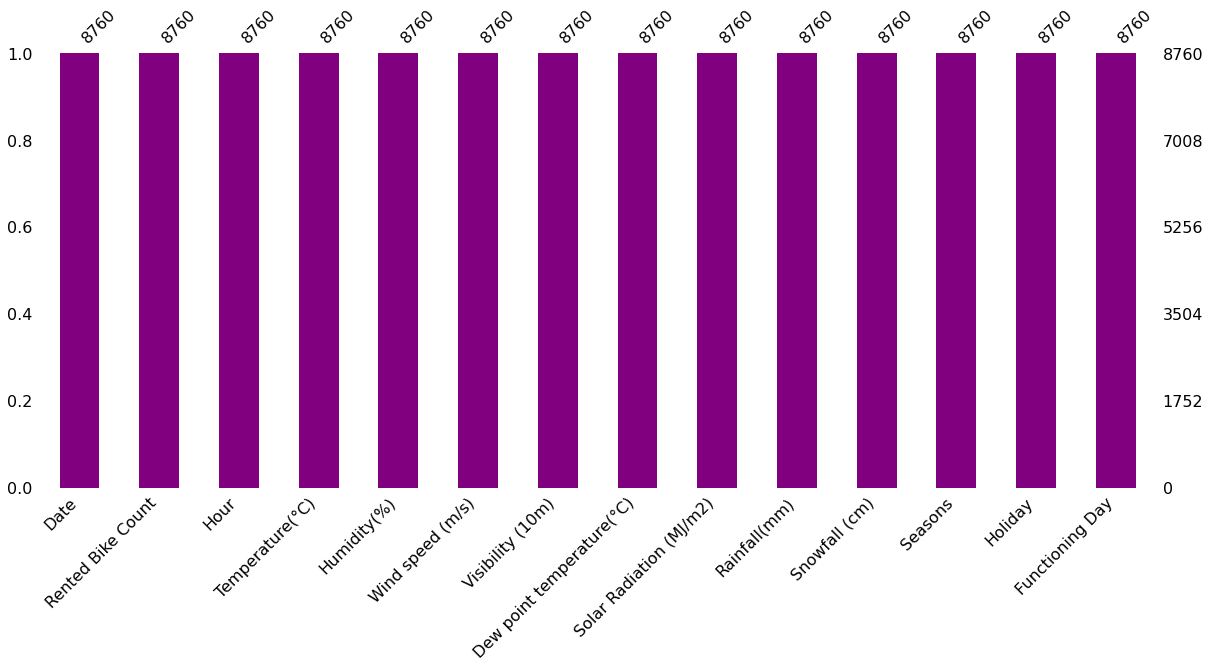

In [11]:
# Visualize missing data
import missingno as mn
mn.bar(bike_df, figsize=(20,8), color='purple')

Features description
Breakdown of Our Features:

Date : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

Rented Bike Count : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

Temperature(°C): Temperature in Celsius, type : Float

Humidity(%): Humidity in the air in %, type : int

Wind speed (m/s) : Speed of the wind in m/s, type : Float

Visibility (10m): Visibility in m, type : int

Dew point temperature(°C): Temperature at the beggining of the day, type : Float

Solar Radiation (MJ/m2): Sun contribution, type : Float

Rainfall(mm): Amount of raining in mm, type : Float

Snowfall (cm): Amount of snowing in cm, type : Float

Seasons: Season of the year, type : str, there are only 4 season's in data .

Holiday: If the day is holiday period or not, type: str

Functioning Day: If the day is a Functioning Day or not, type : str

# finding the type of data of 'Date' column

In [12]:
# Type of date
bike_df['Date'].dtype

dtype('O')

In [13]:
# Cconverting string formate of "Date" into date-time format
bike_df['Date'] = pd.to_datetime(bike_df['Date'],format='%d/%m/%Y')
bike_df['Date'].dtype

dtype('<M8[ns]')

In [14]:
bike_df['year'] = pd.DatetimeIndex(bike_df['Date']).year
bike_df['month'] = pd.DatetimeIndex(bike_df['Date']).month
bike_df['Dayofweek'] = bike_df['Date'].dt.weekday

In [15]:
# Replace month number in words for understanding
bike_df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],inplace=True)

In [16]:
#Replace dayofweek into Numbers
bike_df['Dayofweek'].replace([0,1,2,3,4,5,6],['Mon','Tues','Wed','Thur','Fri','Sat','Sun'],inplace=True)

#. EDA On Dataset
EDA is uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not easily Readble

In [17]:
bike_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


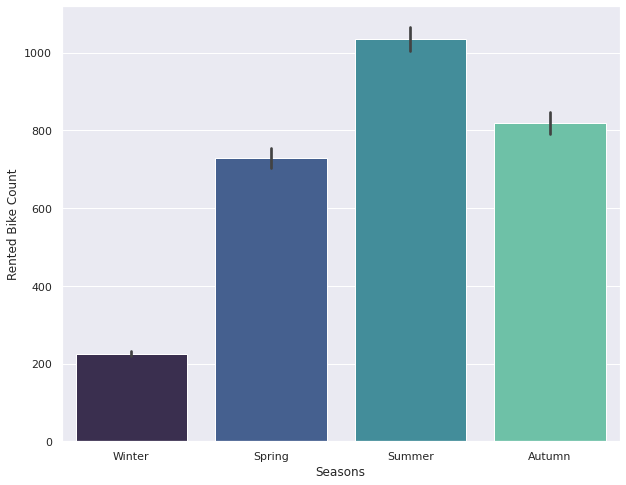

In [18]:
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
sns.barplot(bike_df['Seasons'], bike_df['Rented Bike Count'], palette='mako')

Conclusion = In Summer most of bike have been rented.
            In winter minimun bike have been rented.
            In Spring and Autumn have equal bike rented.

# Data Visualization


Text(0.5, 1.0, 'Count of Rented bikes acording to seasons')

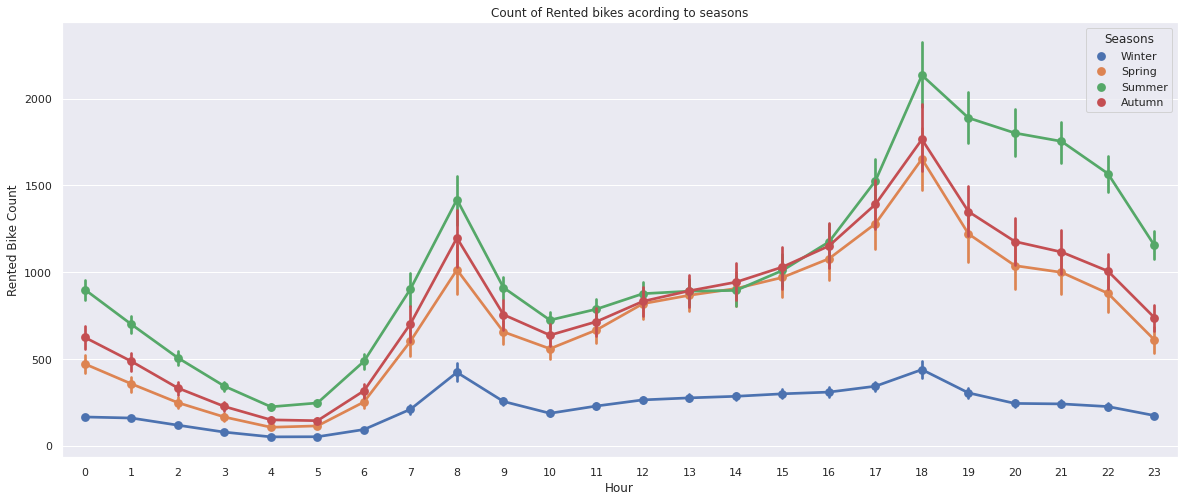

In [19]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='Hour', y='Rented Bike Count', data=bike_df, hue='Seasons', ax=ax)
ax.set_title('Count of Rented bikes acording to seasons')

In [20]:
bike_df['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

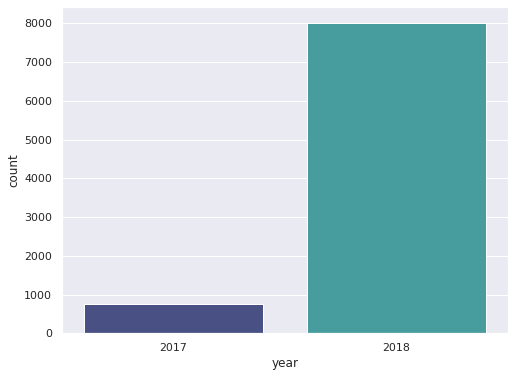

In [21]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'year', data = bike_df,palette='mako')

Conclusion = In year 2018 most number of bike have been rented.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


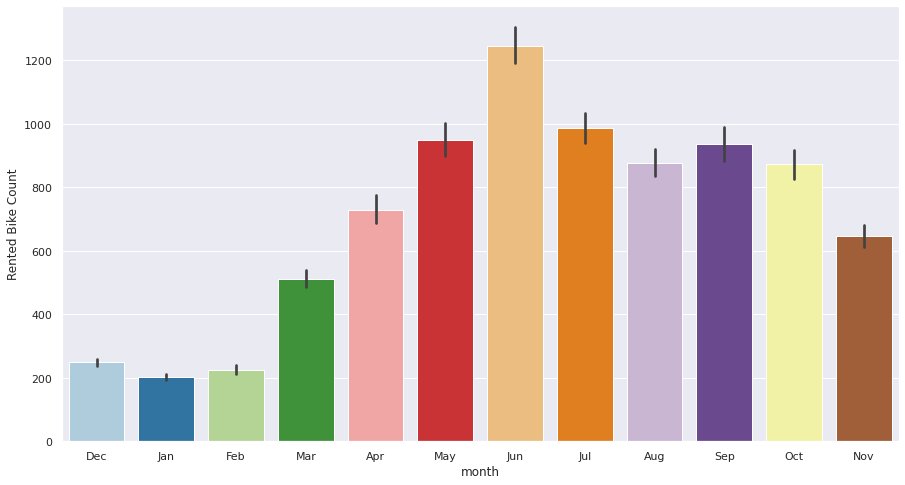

In [22]:
plt.figure(figsize=(15,8))
sns.barplot('month', 'Rented Bike Count', data=bike_df, palette='Paired')

Conclusion: 1 we seen that the most of the bike is rented in jun (summer season) 2 we seen that the rented bike is going decreasing in rainy season 3 we seen that less rented bike is in january (winter season)

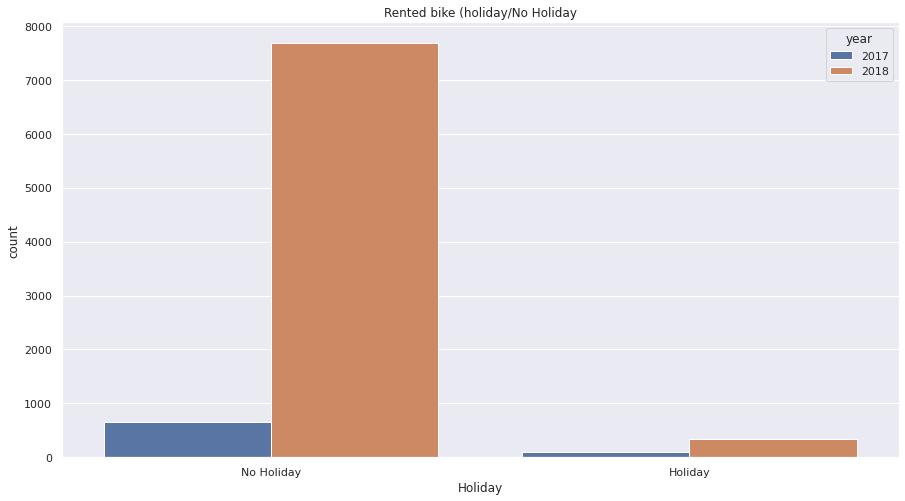

In [23]:
# rented bike on holidays
plt.figure(figsize=(15,8))
sns.countplot(x='Holiday', hue='year', data= bike_df)
plt.title('Rented bike (holiday/No Holiday')
plt.show()

Conclusion = Most of people rent bike when there is no holiday. we can conclude most of working people rent bike on working day.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


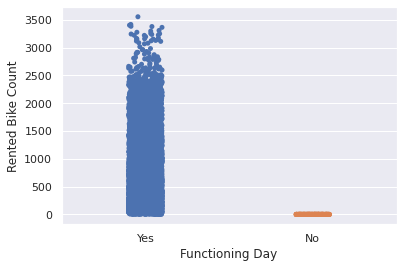

In [24]:
# Functional Day
sns.stripplot(bike_df['Functioning Day'], bike_df['Rented Bike Count'], jitter=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


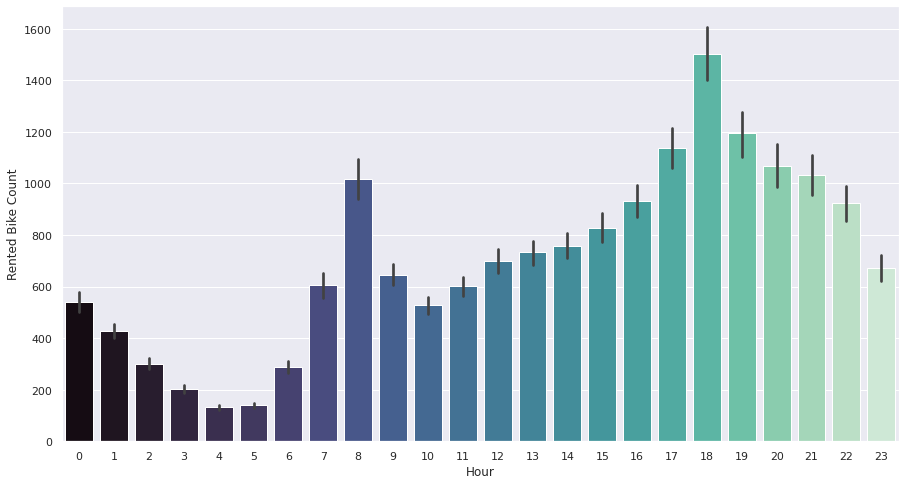

In [25]:
plt.figure(figsize=(15,8))
sns.barplot('Hour','Rented Bike Count', data=bike_df, palette='mako')

Conclusion = On daily basis from 5pm,6pm,7pm most number of bike have been rented. And minimum bike rented in morning from 3am, 4am, 5am

Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')

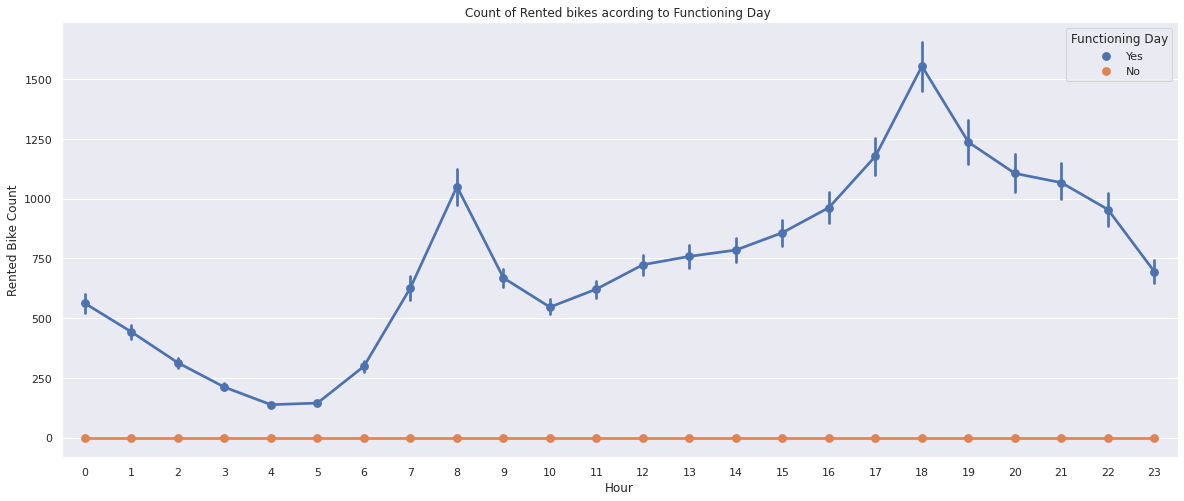

In [26]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='Hour', y='Rented Bike Count', data=bike_df, hue='Functioning Day', ax=ax)
ax.set_title('Count of Rented bikes acording to Functioning Day ')

Conclusion = The number of rented bike count in office timing(morning= 7 to 9am and in evening 5 to 7pm)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


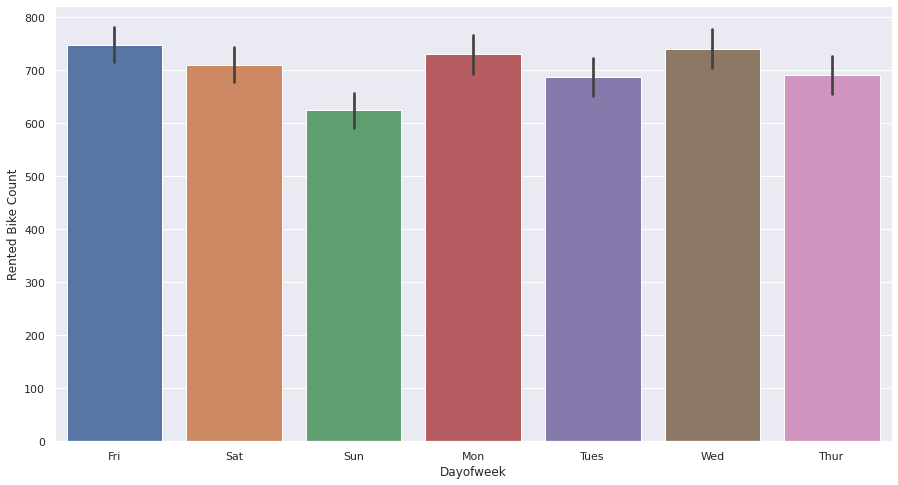

In [27]:
plt.figure(figsize=(15,8))
sns.barplot('Dayofweek','Rented Bike Count', data = bike_df)

Conclusion = 1. On weekend day minimum number of bike are rented.
             2. On week days or working days maximum number of bike are rented.

Text(0.5, 1.0, 'Count of Rented bikes acording to holiday ')

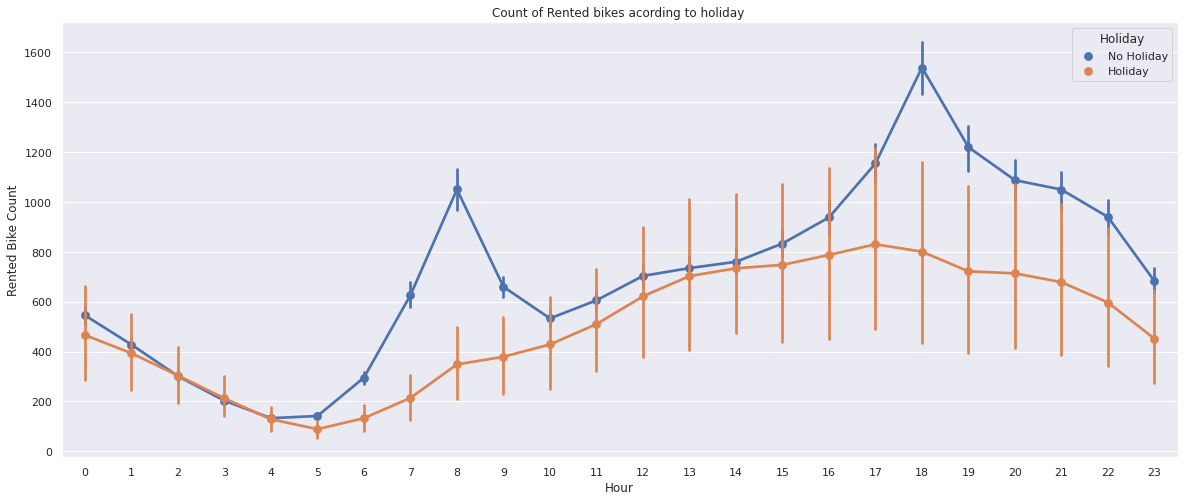

In [28]:
# Count of rented bike according to holidays
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='Hour', y='Rented Bike Count', data=bike_df, hue='Holiday', ax=ax)
ax.set_title('Count of Rented bikes acording to holiday ')

Conclusion = We seen that during holiday time rented bike quite less as compare to working days

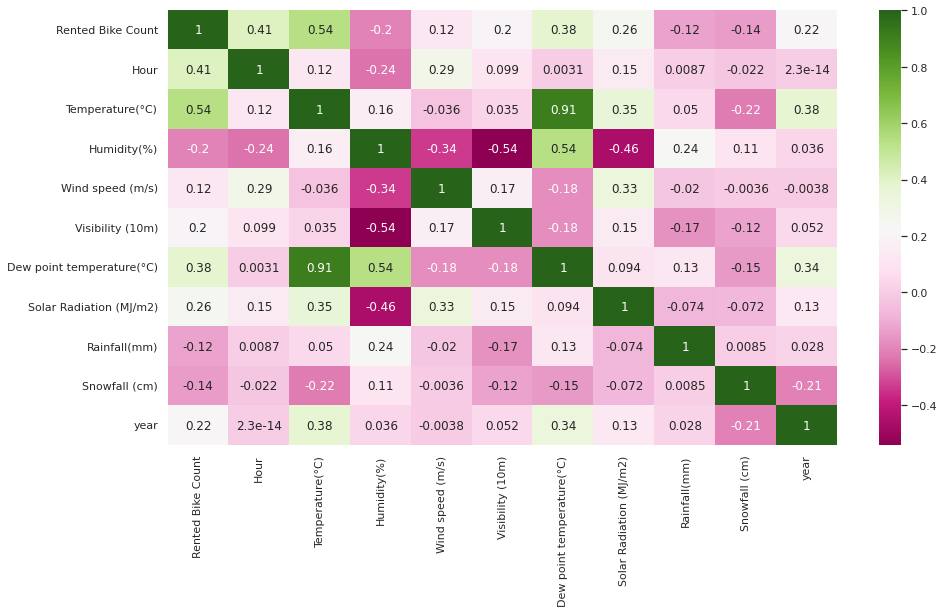

In [29]:
# checking correlation using Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(bike_df.corr(), cmap='PiYG', annot=True)

#  Distribution of target variables

Transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


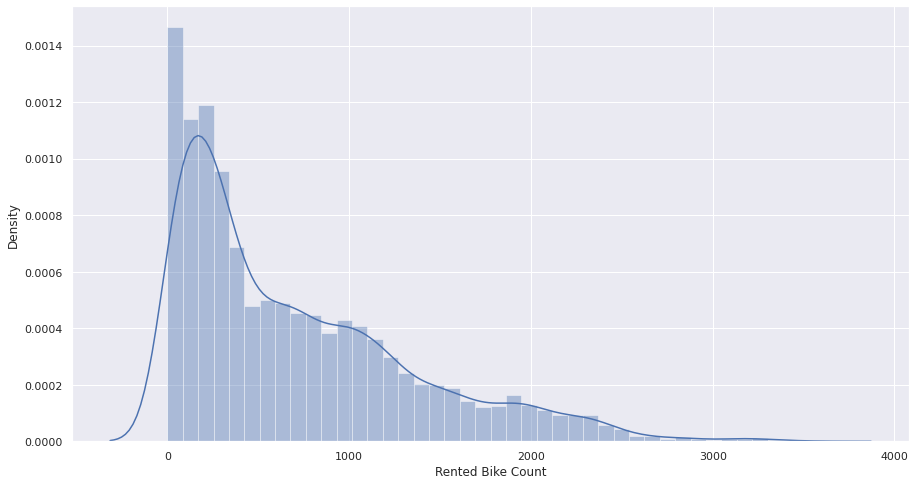

In [30]:
# Dependent variable 'Rented bike count'
plt.figure(figsize=(15,8))
sns.distplot(bike_df['Rented Bike Count'], color='b')

Conclusion = We seen that Rented Bike Count has moderate right skewness.Assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

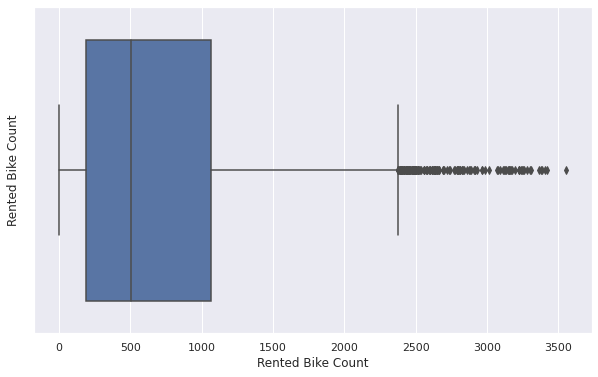

In [31]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=bike_df['Rented Bike Count'])
plt.show()

Conclusion = From Above we seen that we have detect outliers in Rented Bike Count column

In [32]:
# Numerical feature of our dataset
numeric_features = bike_df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year'],
      dtype='object')

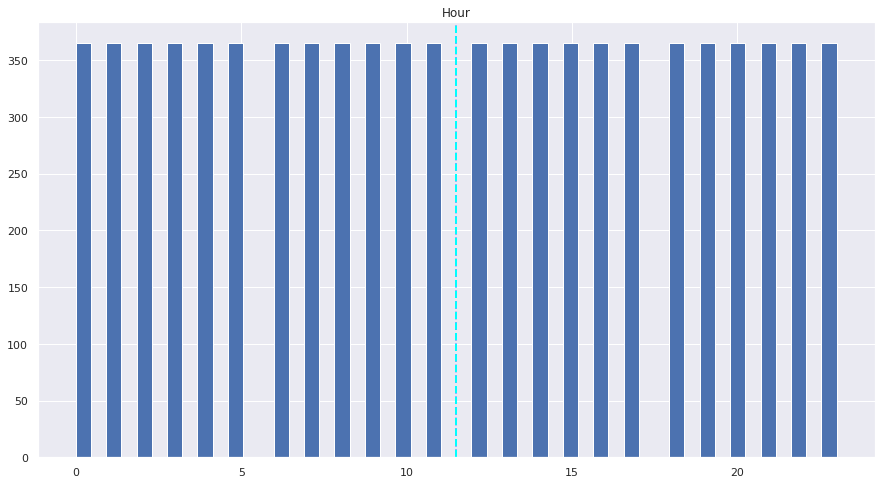

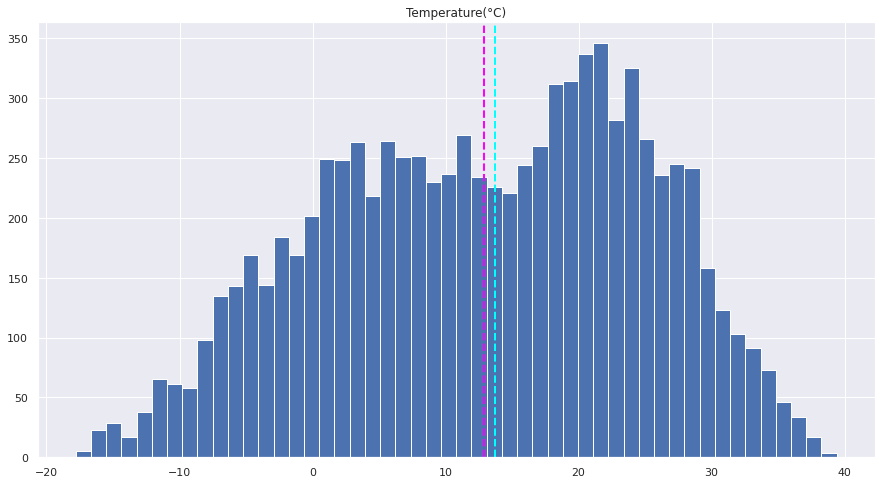

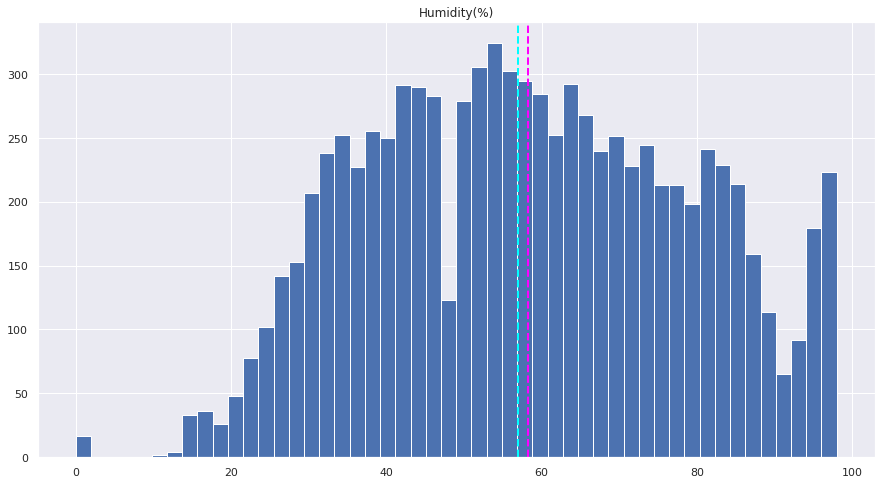

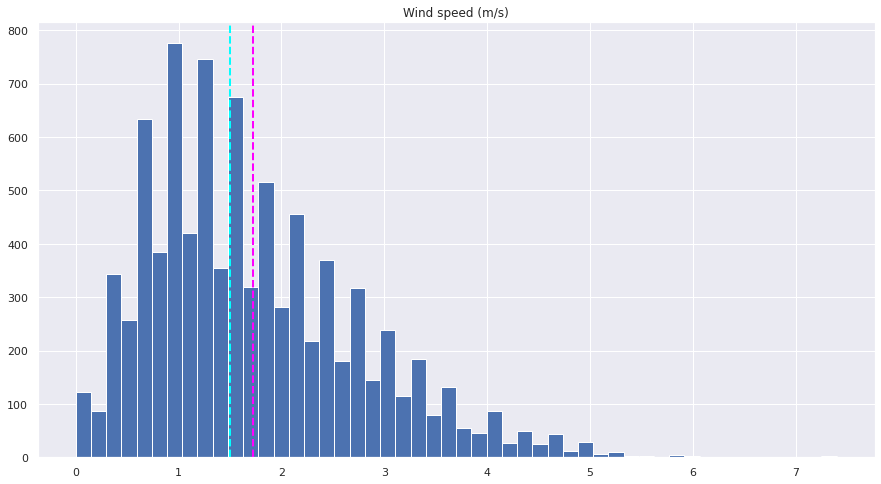

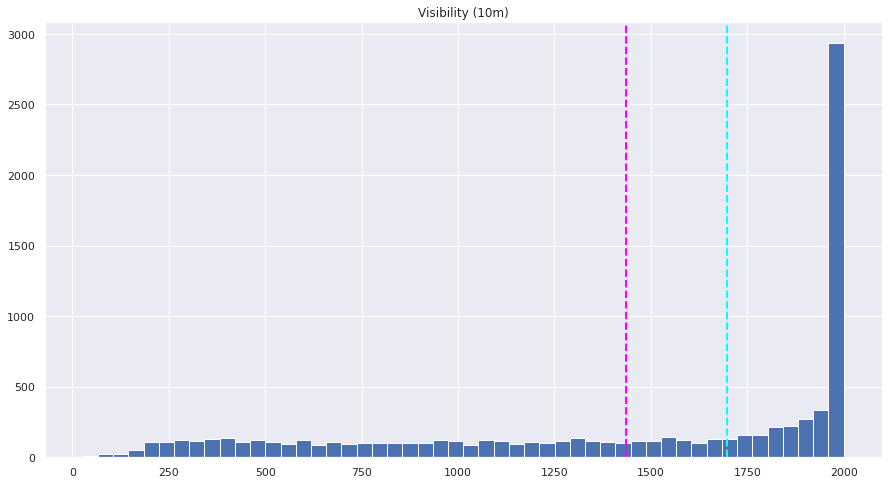

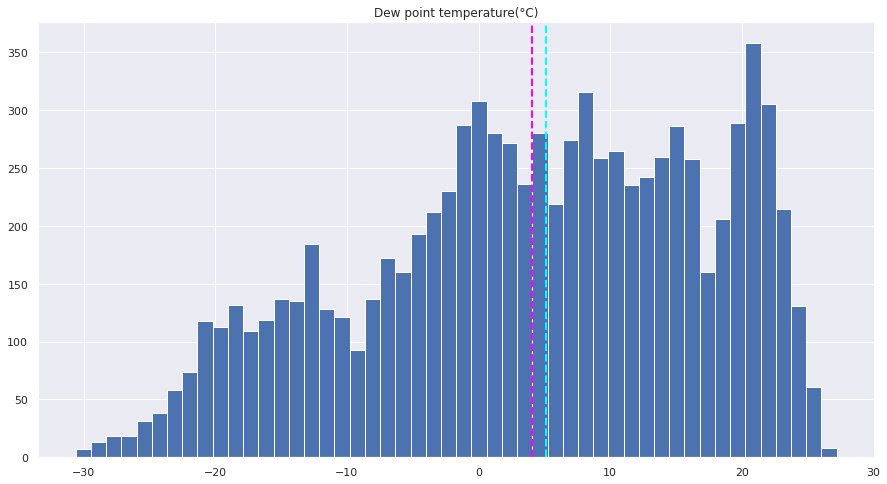

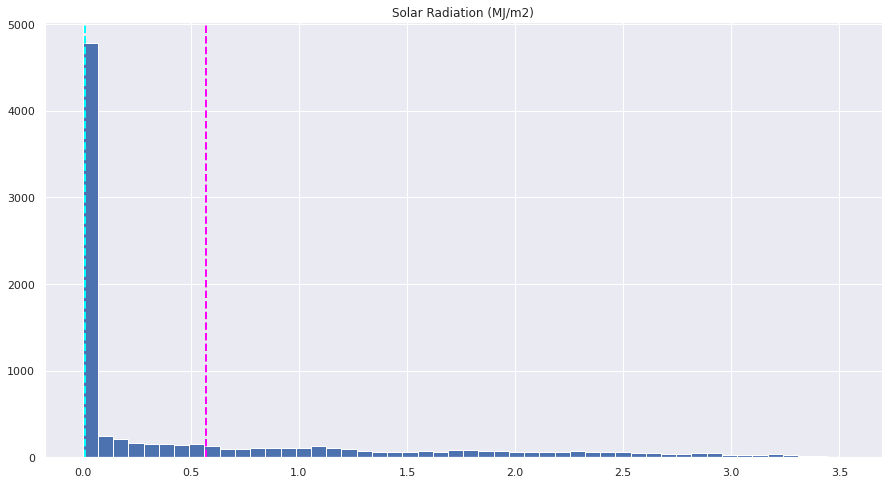

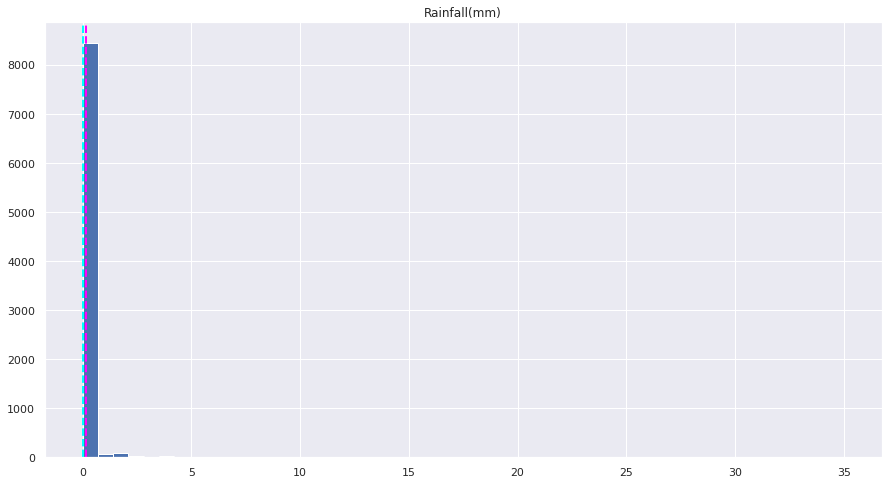

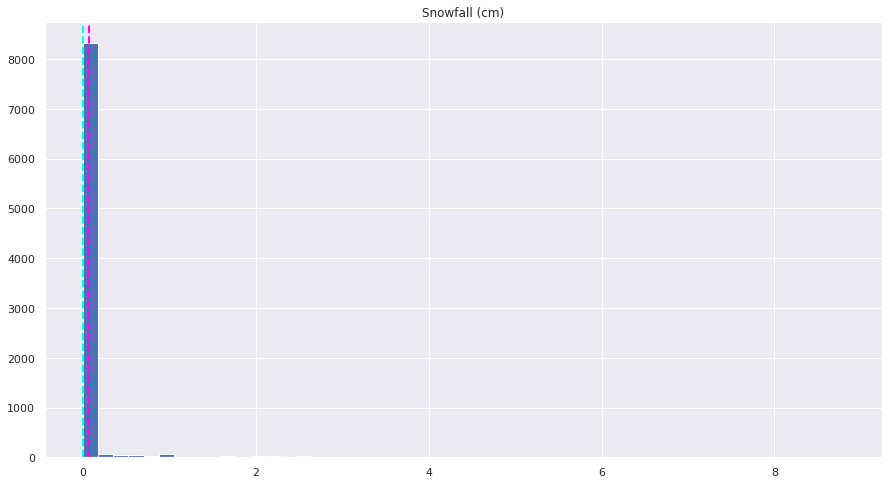

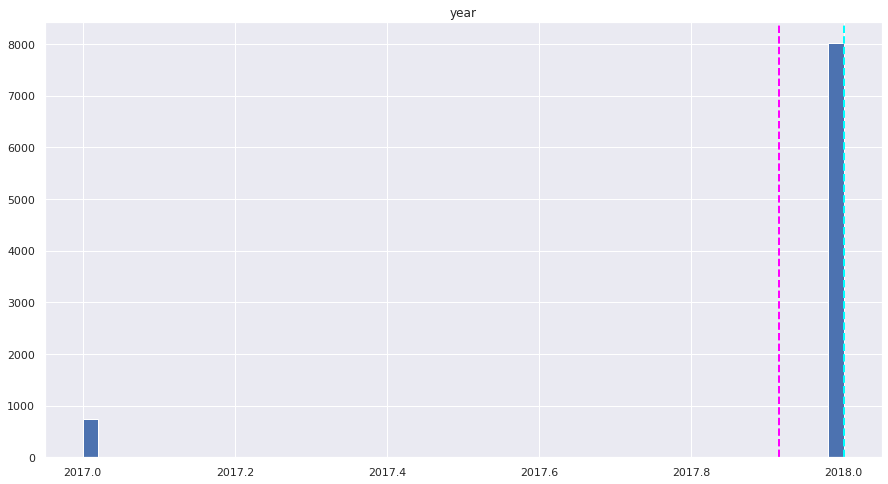

In [33]:
from pandas.core.arrays import numeric
# plot a barplot for each numerical feature count
for col in numeric_features[1:]:
  fig = plt.figure(figsize=(15,8))
  ax = fig.gca()
  feature = bike_df[col]
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color= 'cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()

# Regression plot
Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships. This kinds of plots in seaborn and shows the ways that can be adapted to change the size, aspect, ratio etc. of such plots

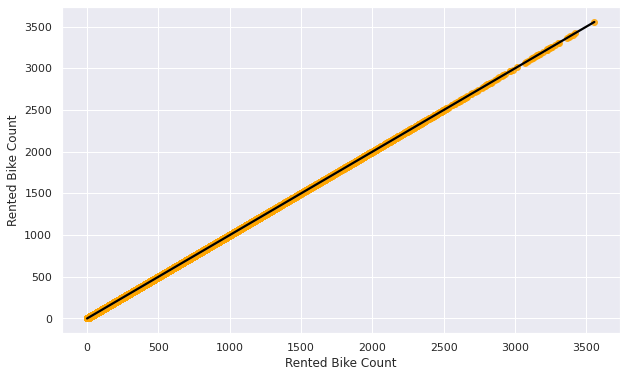

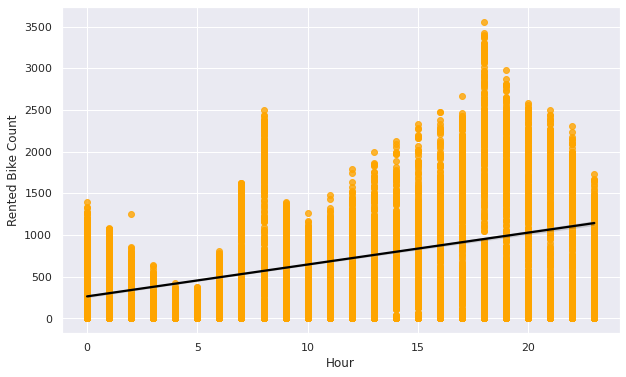

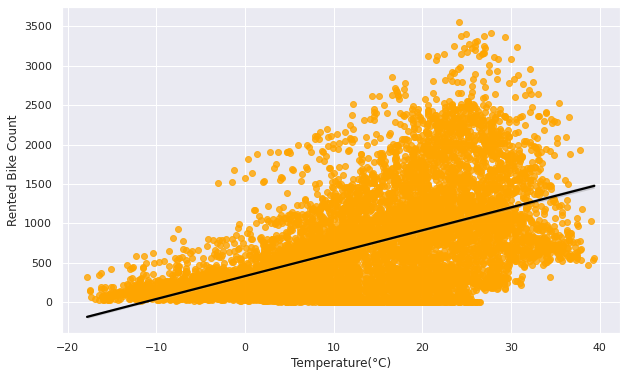

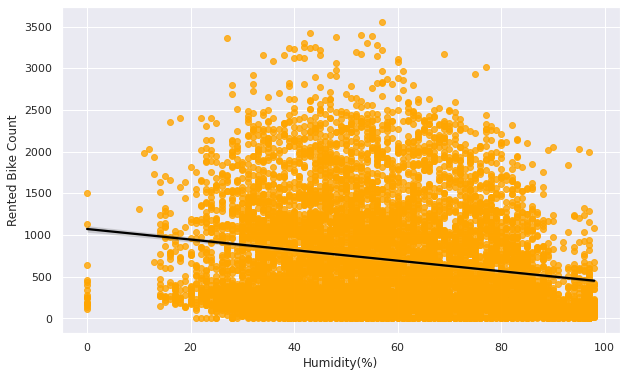

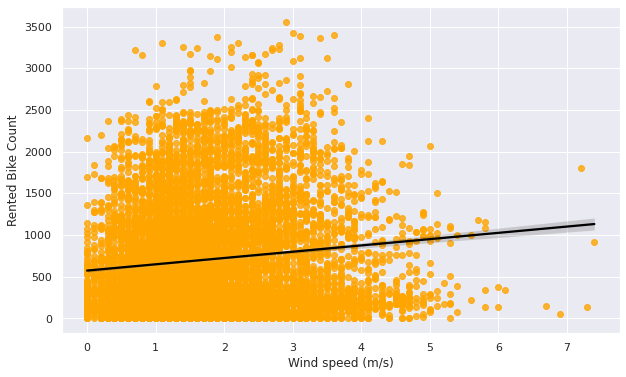

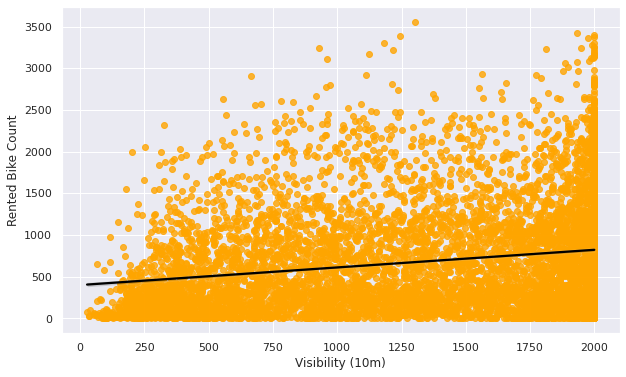

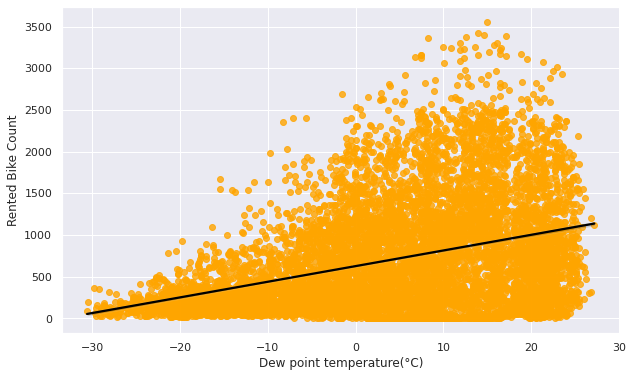

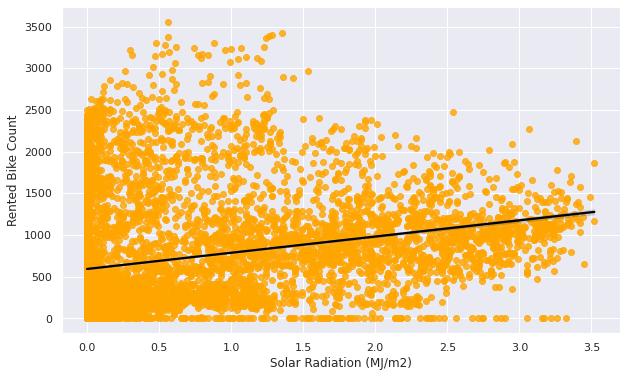

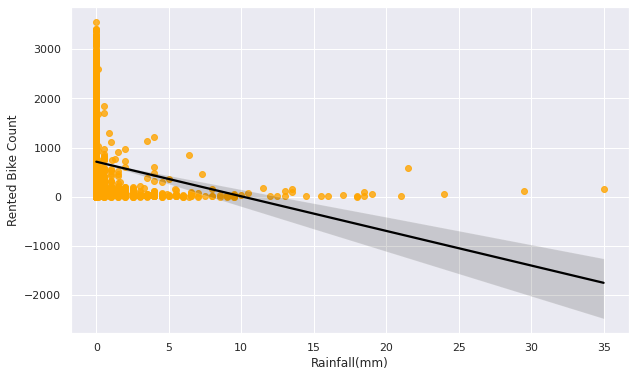

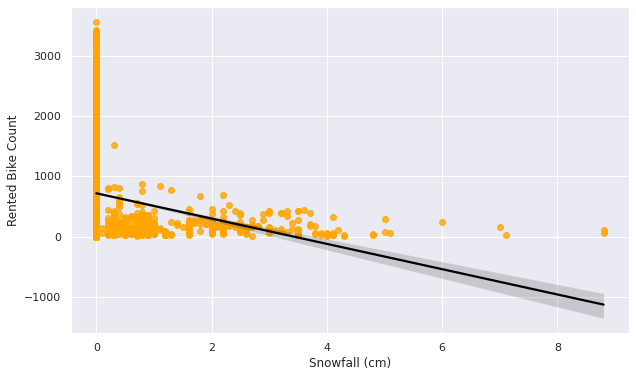

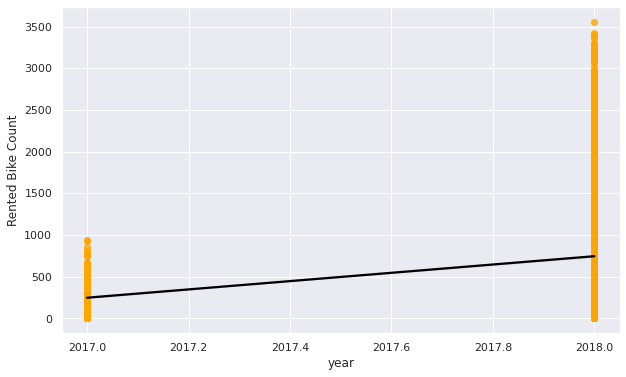

In [34]:
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df[col],y=bike_df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

# sqrt transformation of target features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


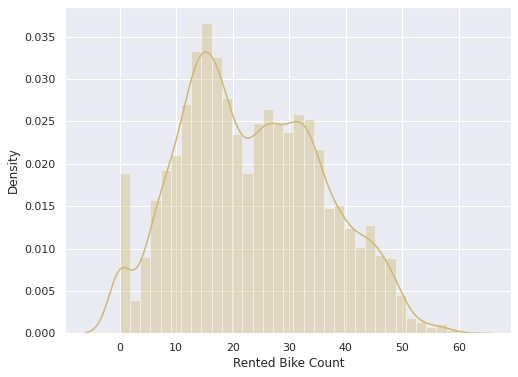

In [35]:
plt.figure(figsize=(8,6))
sns.distplot(np.sqrt(bike_df['Rented Bike Count']),color="y") # normalise 'Rented Bike Count' column data

Conclusion = Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


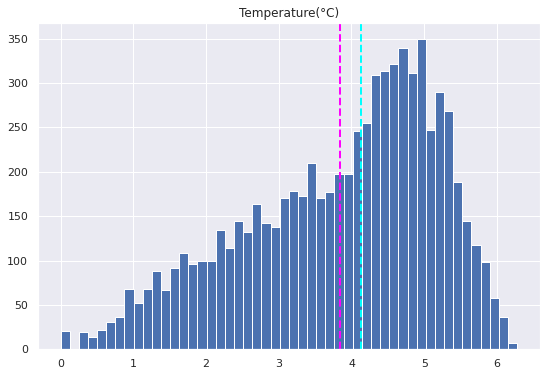

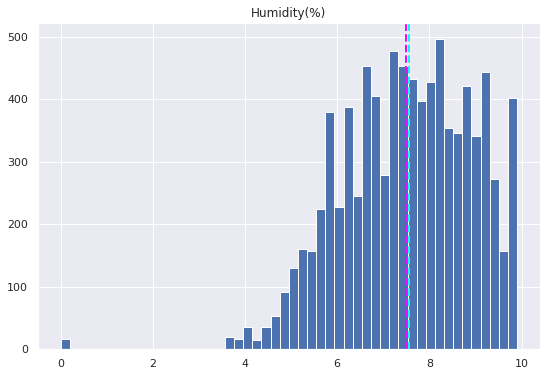

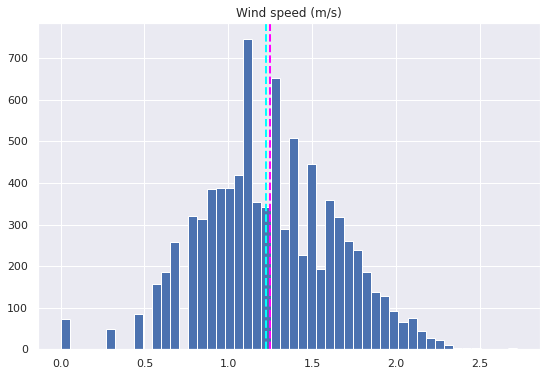

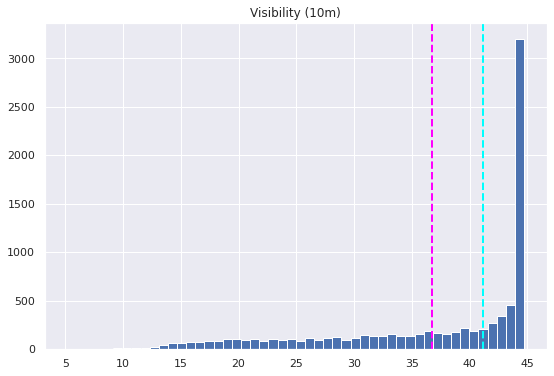

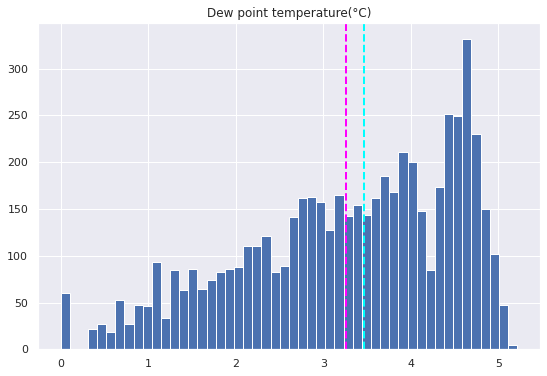

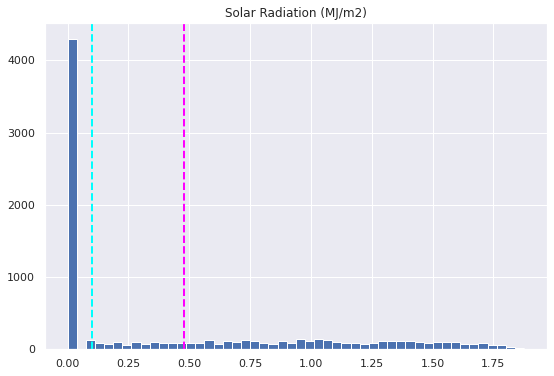

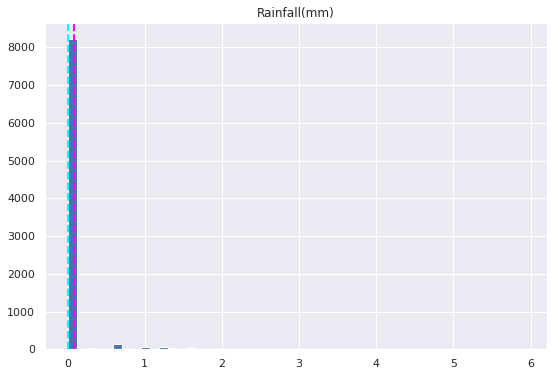

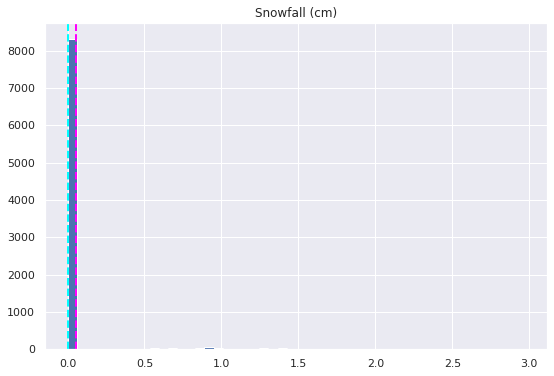

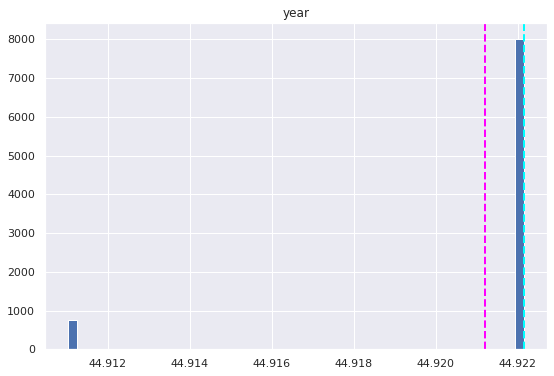

In [36]:
for col in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# Heatmap

we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variable.

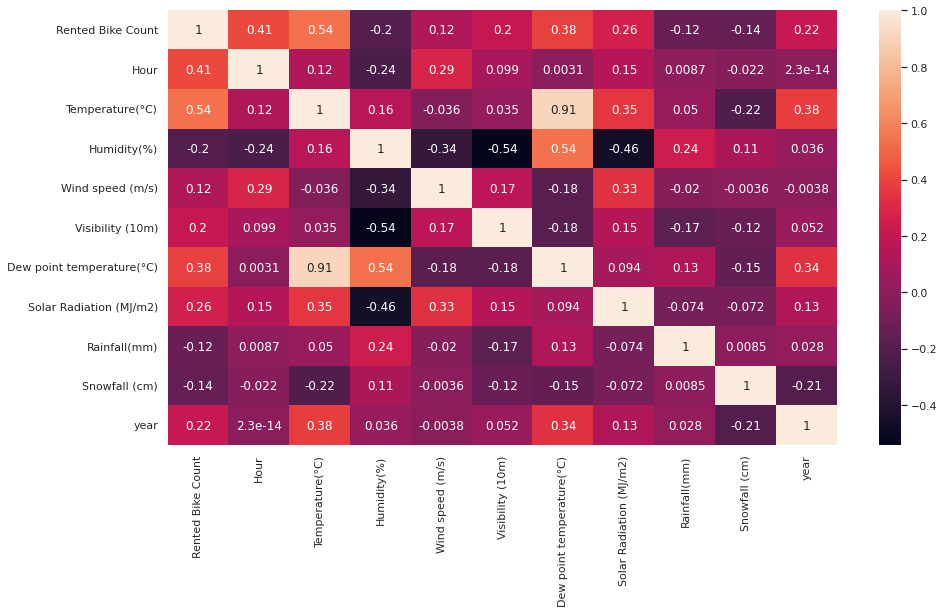

In [37]:
# Correlation of heatmap
plt.figure(figsize=(15,8))
sns.heatmap(bike_df.corr(), cmap='rocket', annot=True)

Conclusion = 1. We seen that form heatmap that on target variable line the most positively correlated variables to the rent are: Tempreture, The dew point tempreture, The solar radiation
           
2. From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.

In [38]:
# Drop the dew point tempreture column
bike_df = bike_df.drop(['Dew point temperature(°C)'],axis=1)

# Label Encoding

In [39]:
# Creating dummy variable for categorical variables- season, month, weekofdays, year, holidays, functional day
seasons = pd.get_dummies(bike_df['Seasons'])
working_day = pd.get_dummies(bike_df['Holiday'], prefix='Holiday')
F_day = pd.get_dummies(bike_df['Functioning Day'], prefix = 'F_day')
month = pd.get_dummies(bike_df['month'])
week_day = pd.get_dummies(bike_df['Dayofweek'])
year = pd.get_dummies(bike_df['year'])

In [40]:
bike_df = pd.concat([bike_df,seasons,working_day,F_day,month,week_day,year],axis=1)

In [41]:
# checking the data dummy variable is created or not

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Sep,Fri,Mon,Sat,Sun,Thur,Tues,Wed,2017,2018
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0


In [42]:
bike_df.drop(['Seasons','Holiday','Functioning Day','Dayofweek','month','year'],axis=1,inplace=True)

In [43]:
bike_df.drop(['Date'],axis=1,inplace=True) # droping date because we already extract the date from the data

In [44]:
# Droping 'Rainfall' and 'Snowfall' column from the data

bike_df=bike_df.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1)

In [45]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [46]:
calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented_Bike_Count',]]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Rented Bike Count,2.398107
1,Hour,1.431340
2,Temperature(°C),10.692730
3,Humidity(%),3.069825
4,Wind speed (m/s),1.319644
5,Visibility (10m),2.310919
6,Solar Radiation (MJ/m2),2.000499
7,Autumn,inf
8,Spring,inf
9,Summer,inf


# Lets Import the models

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Model Training 

In [48]:
# Assign x and y value
X = bike_df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(bike_df['Rented Bike Count'])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=80)
print(X_train.shape)
print(X_test.shape)

(6132, 35)
(2628, 35)


In [50]:
# Scaling data by using minmaxscalar
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [51]:

from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [52]:
# Predicting Train And test results

y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [53]:
#check the score
reg.score(X_train, y_train)

0.6684952553484285

In [54]:
#check the coefficeint
reg.coef_

array([ 1.05289804e+01,  3.33548259e+01, -1.73254888e+01,  1.50589011e+00,
        1.63094476e+00, -4.79403389e+00, -3.90142993e+14, -2.43440906e+14,
       -2.55126930e+14, -1.98224705e+14, -5.35609392e+13, -5.35609392e+13,
       -3.05891129e+13, -3.05891129e+13, -5.30373609e+13, -4.13513369e+13,
        1.68937796e+13, -9.82535622e+13, -9.82535622e+13, -4.13513369e+13,
       -4.13513369e+13, -5.30373609e+13, -5.30373609e+13,  9.36647262e+13,
        9.36647262e+13,  9.36647262e+13,  3.06505425e+13,  3.06505425e+13,
        3.06505425e+13,  3.06505425e+13,  3.06505425e+13,  3.06505425e+13,
        3.06505425e+13, -5.41761397e+13,  6.09712021e+13])

# Evaluation Matrics

In [55]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 51.95488460736373
RMSE : 7.207973682482736
MAE : 5.540875673834399
R2 : 0.6684952553484285
Adjusted R2 : 0.6640189181328401


Looks like our r2 score value is 0.66 that means our model is able to capture most of the data variance

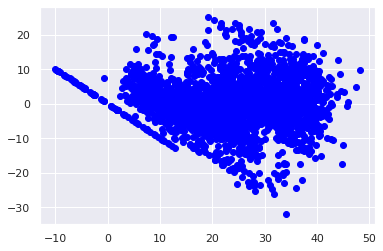

In [56]:
# Heteroscadacity
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test),color='blue')


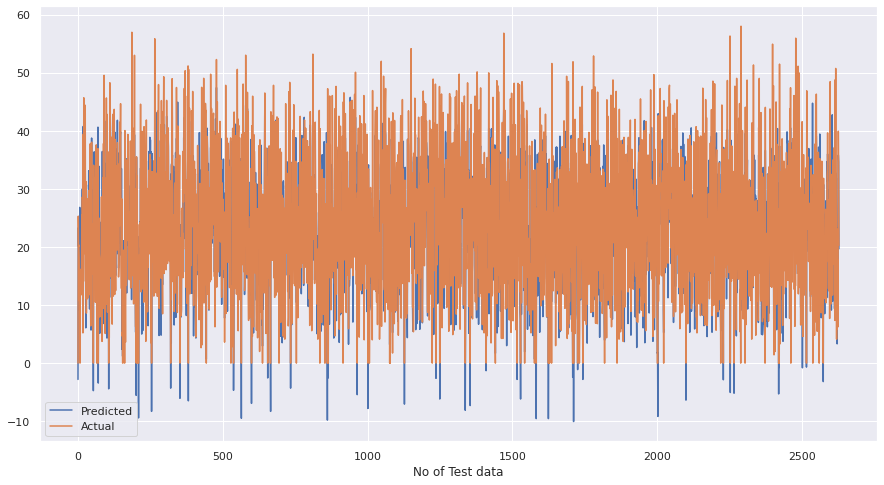

In [57]:
# Plotting result from above model
plt.figure(figsize=(15,8))
plt.plot((y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(['Predicted', 'Actual'])
plt.xlabel('No of Test data')
plt.show()

In [58]:
# storing the Train set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [59]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

# Lasso Regression


In [60]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.01, 0.1, 1, 5, 8]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 8]})

In [61]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.01}


In [62]:
# Fit the Lasso model
lasso.fit(X_train, y_train)

Lasso()

In [63]:
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.2547453417693949 0.23622934494703107


In [64]:
Y_pred_lasso = lasso_regressor.predict(X_test)

In [65]:
# different metrics used

MSE  = mean_squared_error(y_test,Y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_lasso_test = r2_score(y_test,Y_pred_lasso)
print("R2 :" ,r2_lasso_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 51.55697363444692
RMSE : 7.180318491156706
R2 : 0.6584273715007338
Adjusted R2 :  0.653815086779486


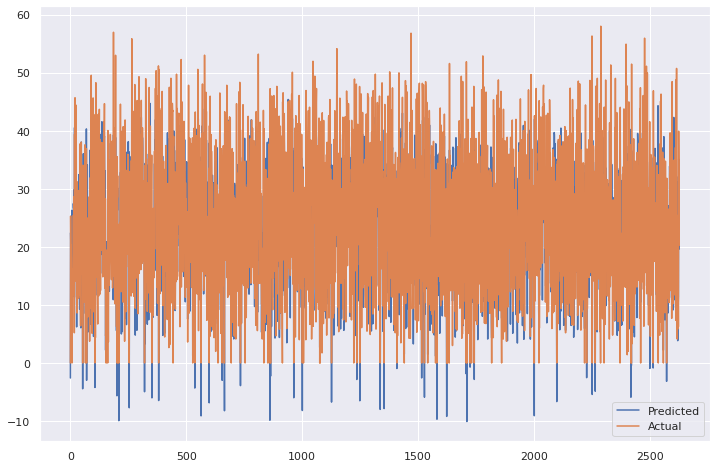

In [66]:
#Plot the figure
plt.figure(figsize=(12,8))
plt.plot(np.array(Y_pred_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

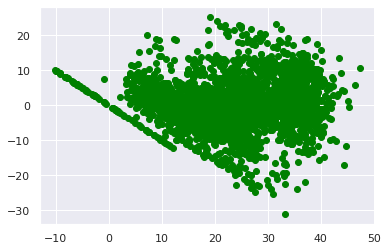

In [67]:
### Heteroscadacity
plt.scatter((Y_pred_lasso),(y_test-Y_pred_lasso), color='green')

# Ridge Regression

In [68]:
# training model

from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1,0.01,0.001,5,10,18,80,400]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.01, 0.001, 5, 10, 18, 80, 400]})

In [69]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
#check the score
ridge_regressor.score(X_train, y_train)

The best fit alpha value is found out to be : {'alpha': 0.01}


0.6687106081422384

In [70]:
#get the X-test value

Y_pred_ridge = ridge_regressor.predict(X_test)

In [71]:
# evaluating metrics

MSE  = mean_squared_error(y_test,Y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_ridge_test = r2_score(y_test,Y_pred_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 51.723651517985616
RMSE : 7.1919157057063465
R2 : 0.6573231056996286
Adjusted R2 :  0.653815086779486


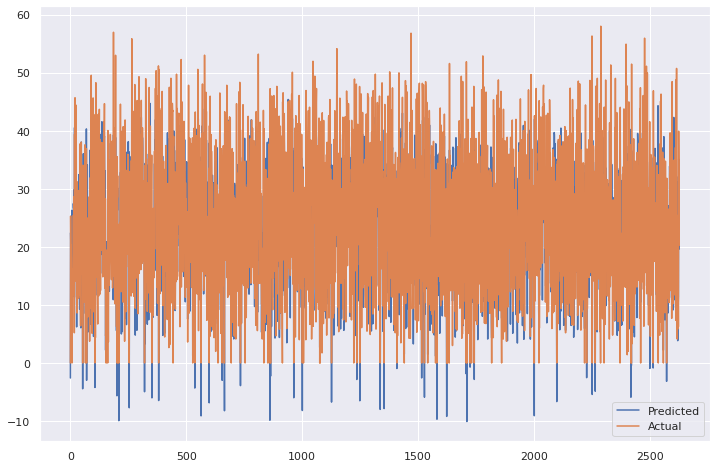

In [72]:
#Plot the figure
plt.figure(figsize=(12,8))
plt.plot(np.array(Y_pred_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

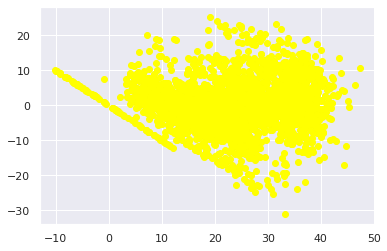

In [73]:
### Heteroscadacity
plt.scatter((Y_pred_lasso),(y_test-Y_pred_lasso), color='yellow')

# Decision Tree - Regression model

In [76]:
# training model

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [77]:
Y_pred_train =regressor.predict(X_train)
Y_pred_train

array([30.90307428,  6.63324958, 16.70329309, ..., 13.11487705,
       11.53256259, 15.3622915 ])

In [78]:
Y_pred_test = regressor.predict(X_test)
Y_pred_test

array([ 0.        , 28.89636655, 19.13112647, ..., 33.83784863,
       37.8153408 , 17.72004515])

In [79]:
r2_score(Y_pred_train,y_train)

1.0

In [80]:
r2_score(Y_pred_test,y_test)

0.8424927113068473

In [81]:
# Tunning the hyper perameters
param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

regressor_gs_cv =GridSearchCV(regressor ,param,scoring='r2',cv=5)
regressor_gs_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 4, 5, 6, 7, 10, 15, 20, 8]},
             scoring='r2')

In [82]:
#looking at the best estimator
regressor_gs_cv.best_estimator_
#checking the score with best parameters
regressor_gs_cv.score(X_test,y_test)

0.8346550953462184

In [83]:
print(f'The r2 score of decision tree is {r2_score(Y_pred_test,y_test)}')
print('\n')
print(f'the r2 score of decision tree with hyper perameteres tunning is {regressor_gs_cv.score(X_test,y_test)} ')

The r2 score of decision tree is 0.8424927113068473


the r2 score of decision tree with hyper perameteres tunning is 0.8346550953462184 


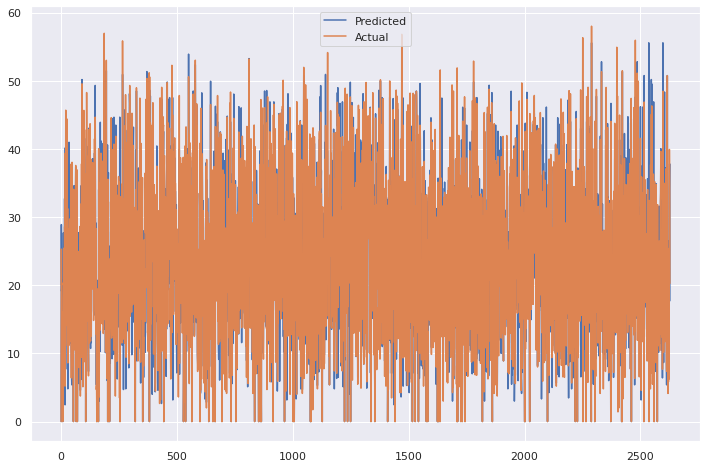

In [85]:
#Plot the figure
plt.figure(figsize=(12,8))
plt.plot((np.array(Y_pred_test)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

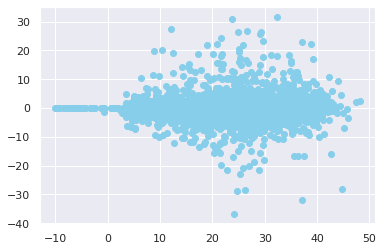

In [84]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(Y_pred_test), color='skyblue')

# Gradient boosting

In [86]:
gb_model_1 = GradientBoostingRegressor()
gb_model_1.fit(X_train,y_train)

GradientBoostingRegressor()

In [87]:
# Making predictions on train and test data

y_pred_train_g = gb_model_1.predict(X_train)
y_pred_test_g = gb_model_1.predict(X_test)

In [88]:
r2_score(y_train, y_pred_train_g)

0.893874139645561

In [89]:
gb_model_1 = r2_score(y_test, y_pred_test_g)
gb_model_1

0.8697837170795134

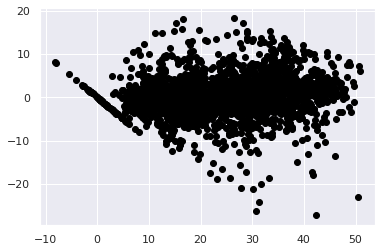

In [90]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g), color='black')

# Evaluation

In [91]:
# creating a list of all model names

model_list = ['Linear regression','Lasso regression','Ridge regression','Decision Tree Regressor','Gradient Bossting regressor']

In [96]:
result_list = [r2_lasso_test,r2_ridge_test,r2_score(Y_pred_test,y_test),regressor_gs_cv.score(X_test,y_test),r2_score(y_train, y_pred_train_g)]

In [97]:
# creating an empty dataframe

results_df = pd.DataFrame()

In [98]:
# adding above lists to the empty dataframe

results_df['model name'] = model_list
results_df['R2-score'] = result_list

In [99]:
# dataframe containing results from all the above models used

results_df

,model name,R2-score
0,Linear regression,0.658427
1,Lasso regression,0.657323
2,Ridge regression,0.842493
3,Decision Tree Regressor,0.834655
4,Gradient Bossting regressor,0.893874


Conclusion:

1. Demand for bikes got higher when the temperature and hour values were more.

2. Demand was high for low values of Humidity and solar radiation.

3. Demand was high during springs and summer and autumn and very low during winters.

4. Maximum bikes were reneted in the year 2018

5. Count of rented bikes is high during no holiday and functioning day especially during office time.

# Model Fitting Conclusion

1. From above its clear that Gradient Boosting regressor(CV) model is the best model for this dataset.

2. Decision tree  Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 83% and 89% recpectively
3. The most important features who had a major impact on the model predictions were; hour, temperature, Humidity, solar-radiation, and Winter.

**The model performed well in this case but as the data is time dependent, values of temperature, wind-speed, solar radiation etc. will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time**